# Qui êtes-vous ?
<div class="alert alert-block alert-info">
Écrire ci-dessous votre nom, prénom et numéro étudiant :
</div>

* BENHADDAD Sabrina - 21200140
* BENSIDHOUM Azzedine - 21215880

# TME 03 - Opérateurs d'agrégation et LIME

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt


## A - Opérateurs d'agrégation

<div class="alert alert-block alert-warning">
L'objet de la 1ère partie de TME est de tracer les lignes de niveaux des opérateurs d'agrégation vus en cours
</div>

<div class="alert alert-block alert-info">
    Ecrire une fonction qui calcule la moyenne pondérée d'un vecteur <code>x</code> en fonction d'un vecteur <code>poids</code>
</div>

In [ ]:
def moy_pond(x,poids):
  return np.dot(x,poids)

In [ ]:
#test de la fonction : calcule la moyenne pondérée
x = np.array([20, 10])
poids = np.array([0.8, 0.2])

moy_pond(x,poids)

18.0

<div class="alert alert-block alert-info">
    Ecrire une fonction qui trace les lignes de niveaux d'un opérateur, en l'appliquant à des vecteurs de taille 2.
</div>

In [ ]:
def contour_plot(x, poids, operateur):
    """ Fonction permettant de tracer les lignes de niveaux d'un opérateur en l'appliquant à des vecteurs de taille 2
    Entrées :
        - x : les données
        - poids : les poids (optionnel)
        - operateur : chaine de caractère spécifiant l'opérateur utilisé
    Sortie  :
        - La visualisation des courbes de niveaux
    """
    X, Y = np.meshgrid(x, x)

    if operateur == 'moyenne ponderee':
        Z = np.zeros_like(X)
        for i in range(Z.shape[0]):
            Z[i, :] = moy_pond(np.column_stack((X[i, :], Y[i, :])), poids)
    elif operateur == 'OWA':
        Z = np.zeros_like(X)
        for i in range(Z.shape[0]):
            Z[i, :] = OWA(np.column_stack((X[i, :], Y[i, :])), poids)
    elif operateur == 'min':
        Z = np.minimum(X, Y)
    elif operateur == 'produit':
        Z = X * Y
    elif operateur == 'max_':
        Z = np.maximum(X + Y - 1, 0)
    elif operateur == 'max':
        Z = np.maximum(X, Y)
    elif operateur == 'sprod':
        Z = X + Y - X * Y
    elif operateur == 'min_':
        Z = np.minimum(X + Y, 1)
    elif operateur == 'godel':
        Z = godel(X, Y)
    elif operateur == 'choquet':
        Z = np.zeros_like(X)
        for i in range(X.shape[0]):
          for j in range(X.shape[1]):
            Z[i,j] = choquet([X[i,j],Y[i,j]], poids)

    # Pour la visualisation
    fig, ax = plt.subplots()
    CS = ax.contourf(X, Y, Z, levels=25)
    fig.colorbar(CS)
    ax.set_title("Ligne de niveaux pour l'opérateur :  " + operateur)



<div class="alert alert-block alert-info">
    Ecrire une fonction qui calcule un OWA d'un vecteur <code>x</code> en fonction d'un vecteur <code>poids</code>
</div>

In [ ]:
def OWA(x, poids):
  x_ = np.sort(x)
  return np.dot(x_,poids)

In [ ]:
#Test de la fonction : calcule l'OWA pour les mêmes données plus haut
OWA(x,poids)

12.0

<div class="alert alert-block alert-info">
    Visualiser les lignes de niveaux de différentes configurations des moyennes pondérées et des OWA pour différents vecteurs de poids.    
</div>

In [ ]:
#Visualisation des lignes de niveaux pour l'opérateur de la moyenne pondérée et OWA
x = np.linspace(0,1,100)
poids = np.array([0.9, 0.1])

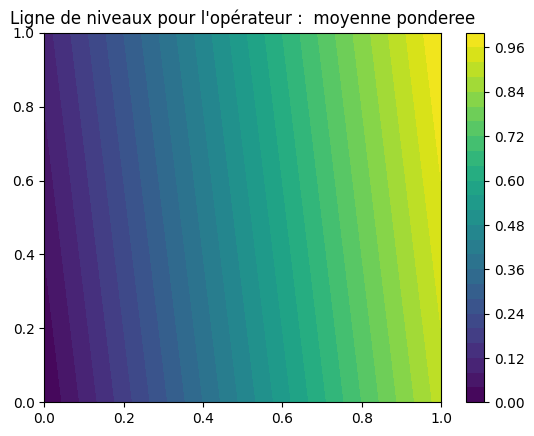

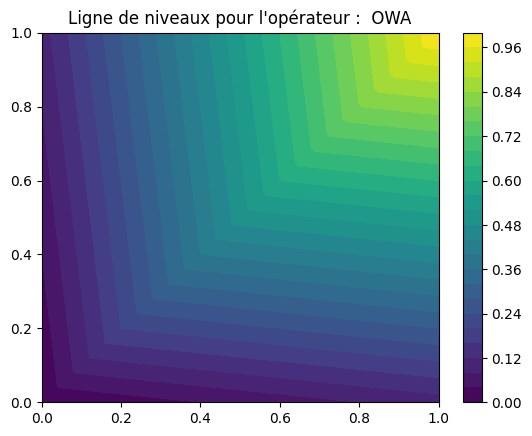

In [ ]:
contour_plot(x, poids, operateur = 'moyenne ponderee')
contour_plot(x,poids, operateur = 'OWA')

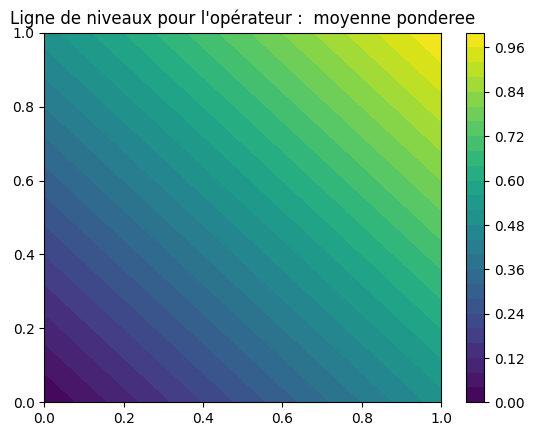

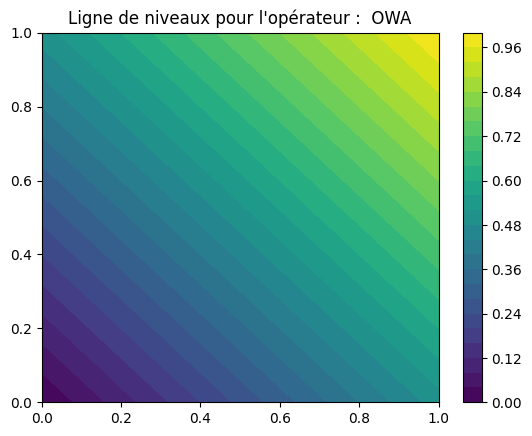

In [ ]:
poids = [0.5, 0.5]
contour_plot(x, poids, operateur = 'moyenne ponderee')
contour_plot(x,poids, operateur = 'OWA')

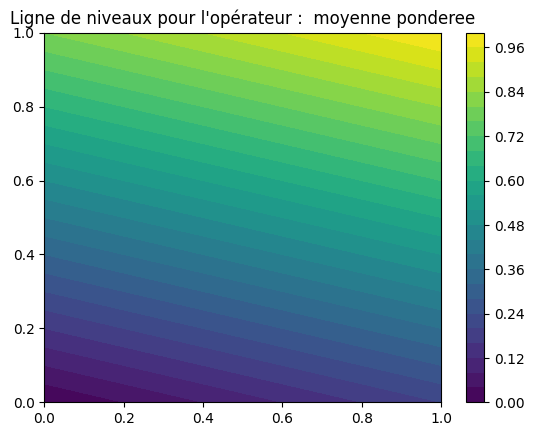

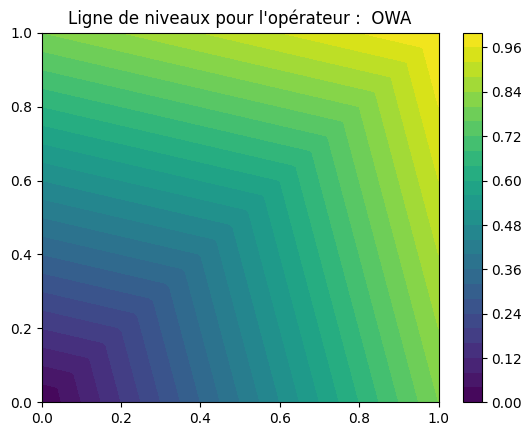

In [ ]:
poids = [0.2,0.8]
contour_plot(x, poids, operateur = 'moyenne ponderee')
contour_plot(x,poids, operateur = 'OWA')

<div class="alert alert-block alert-info">
    Visualiser aussi les lignes de niveaux des opérateurs conjonctifs et disjonctifs vus en cours, ainsi que l'opérateur à comportement variable (intégrale de Gödel), après avoir défini les fonctions permettant de calculer ces opérateurs.
</div>

#### Opérateurs conjonctifs
1. Le minimum
2. Le produit
3. Max(u + v -1, 0)

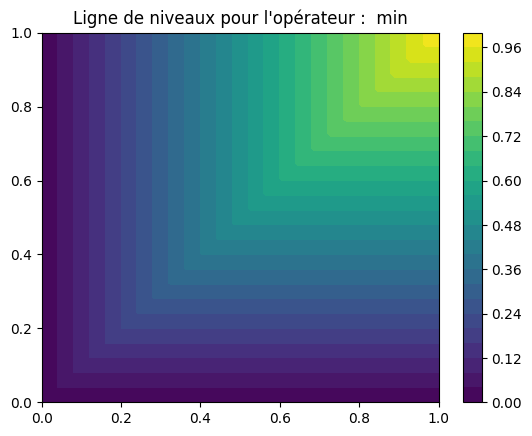

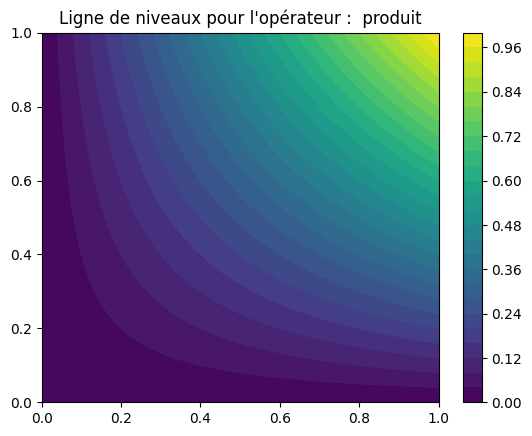

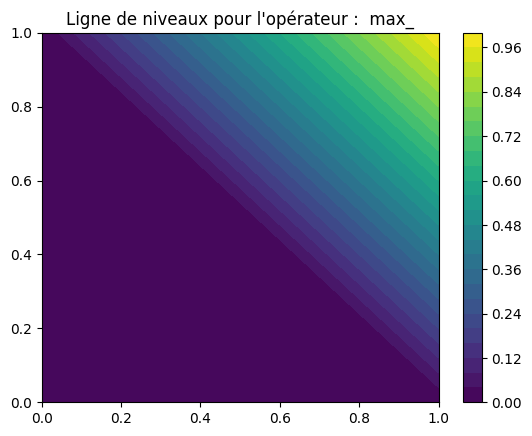

In [ ]:
contour_plot(x,poids, operateur = 'min')
contour_plot(x,poids,operateur = 'produit')
contour_plot(x,poids,operateur = 'max_')

#### Opérateurs disjonctifs
1. Le maximum
2. u + v - uv
3. Min(u + v, 1)

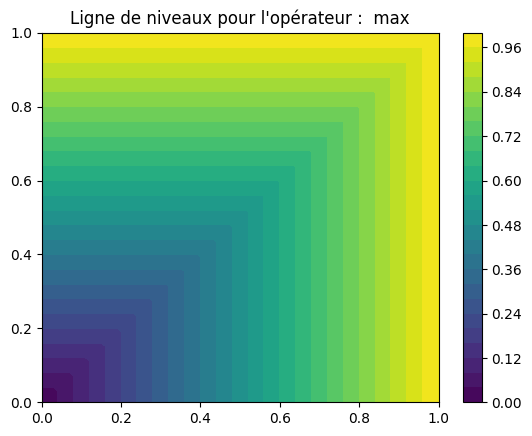

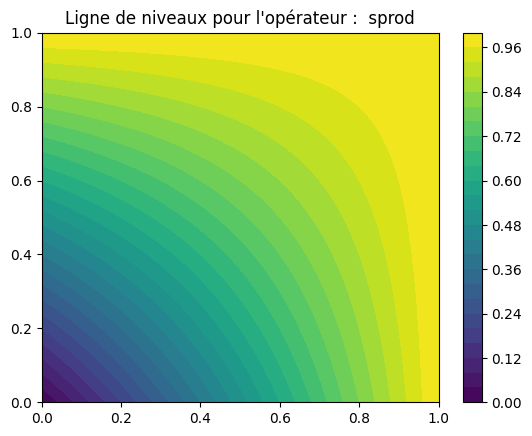

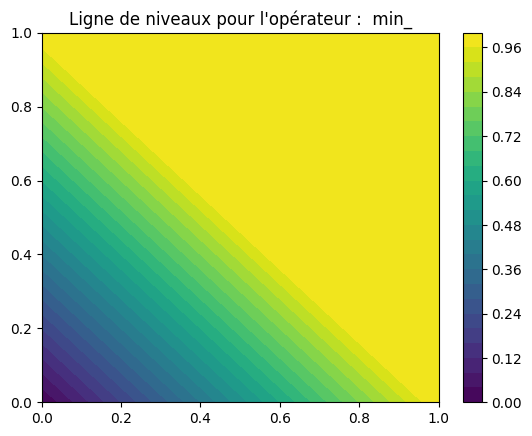

In [ ]:
contour_plot(x,poids, operateur = 'max')
contour_plot(x,poids,operateur = 'sprod')
contour_plot(x,poids,operateur = 'min_')

#### Intégrales de Godel

In [ ]:
def godel(x,y, alpha_x = 0.6, beta_y = 0.4):
  result = y.copy()

  cas1 = np.where((x<=1 - alpha_x) & (y<= beta_y))
  cas2 = np.where((x > 1 - alpha_x) & (y > 1 - beta_y))
  cas3 = np.where((x > 1 - alpha_x) & (y <= 1 -beta_y))
  cas4 = np.where((x <= 1 - alpha_x )& (y >1 - beta_y))

  result[cas1] = np.minimum(x[cas1],y[cas1])
  result[cas2] = np.maximum(x[cas2],y[cas2])
  result[cas3] = x[cas3]
  result[cas4] = y[cas4]
  return result

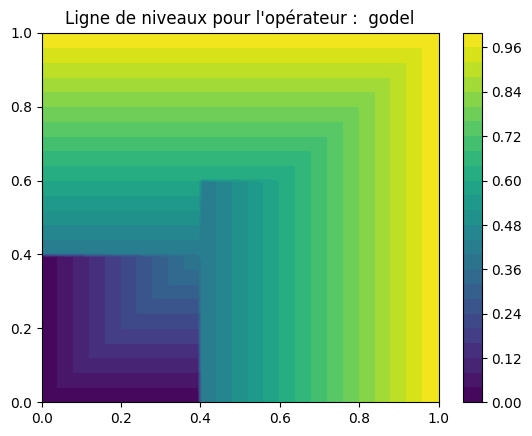

In [ ]:
contour_plot(x,poids, operateur = 'godel')

#### Intégrales de choquet


<div class="alert alert-block alert-info">
    Ecrire une fonction qui calcule l'intégrale de Choquet d'un vecteur <code>x</code> en fonction d'une capacité <code>mu</code>.<br>
    La fonction ne doit pas imposer de restriction au nombre de composantes de <code>x</code>, sa documentation doit expliciter la représentation choisie pour <code>mu</code>, la fonction doit inclure une vérification que <code>mu</code> satisfait les propriétés d'une capacité.
    
</div>

In [ ]:
#Fonction pour vérifier que mu satisfait les propriétés d'une capacité
def mu_correct(perm,mu):
  """Fonction qui vérifie que mu satisfait les propriétés d'une capacité (mu dictionnaire) :
  1. Monotonie : mu doit être croissant
  2. Satisfaits les conditions limites
  """

  # Vérification de la monotonie
  previous_max = -float("inf")  # La valeur maximale précédente
  for i in range(len(perm)):
    current_subset = frozenset(perm[:i + 1])
    current_max = mu[current_subset]

    if current_max < previous_max:
      print("Problème de monotonicité pour mu")
      return False

    previous_max = current_max

  #Vérification des conditions limites
  if mu[frozenset(perm)] != 1 or mu[frozenset([])] != 0 :
    print("Problème aux bornes de mu : pb de consitions limites")
    return False

  return True

Tests de la fonction **mu_correct**

In [ ]:
mu = {
    frozenset([0, 1]): 1,
    frozenset([1]): 0.2,
    frozenset([0]): 0.5,
    frozenset([]): 0,
}
mu_correct(np.array([1, 2]),mu)

True

In [ ]:
mu = {
    frozenset([0, 1]): 0.5,
    frozenset([0]): 0.3,
    frozenset([1]): 0.2,
    frozenset([]): 0,
}
mu_correct(np.array([1, 2]),mu)

Problème aux bornes de mu : pb de consitions limites


False

In [ ]:
mu = {
    frozenset([0, 1]): 1,
    frozenset([0]): 0.3,
    frozenset([1]): 0.2,
    frozenset([]): 0.002,
}
mu_correct(np.array([1, 2]),mu)

Problème aux bornes de mu : pb de consitions limites


False

In [ ]:
mu = {
    frozenset([0, 1, 2]): 1,
    frozenset([0, 1]): 0.3,
    frozenset([0, 2]): 0.5,
    frozenset([1, 2]): 0.2,
    frozenset([0]): 0.7,
    frozenset([1]): 0.2,
    frozenset([2]): 0.4,
    frozenset([]): 0,
}
mu_correct(np.array([1, 2,3]),mu)

Problème de monotonicité pour mu


False

In [ ]:
def choquet(x, mu):
  """Calcule l'intégrale de Choquet
  Entrée : x vecteur de valeurs et mu : capacité """

  #D'après la formule du cours, nous aurons besoin des permutations
  #Permutation : pour trier les éléments de mu
  perm = np.argsort(x)

  if mu_correct(perm, mu):
    result = 0
    for i in range(len(x)):
      sigma_i = frozenset(perm[i:])
      sigma_ib = frozenset(perm[i+1:])
      result += (mu[frozenset(sigma_i)] - mu[frozenset(sigma_ib)]) * x[perm[i]]
    return result

In [ ]:
#Test :
mu = {
    frozenset([0, 1]): 1,
    frozenset([0]): 0.5,
    frozenset([1]): 0.9,
    frozenset([]): 0.0,
}
choquet([1,2],mu)

1.9

<div class="alert alert-block alert-info">
    Visualiser les lignes de niveaux de différentes intégrales de Choquet, pour différentes valeurs des paramètres.
</div>

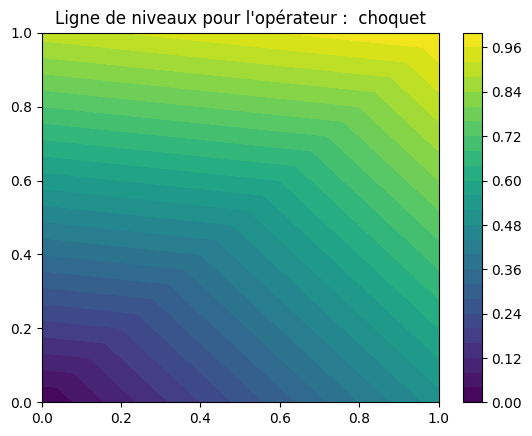

In [ ]:
contour_plot(x,poids=mu, operateur = 'choquet')

<div class="alert alert-block alert-info">
    Commenter les résultats obtenus.
</div>

<div>
</div>

In [ ]:
# Commentaire : Nous avons obtenus exactement ce qu'on a démontré en cours

## B - LIME

<div class="alert alert-block alert-warning">
L'objet de cette 2ème partie de TME est de tester l'algorithme LIME sur une tâche de classification assez simple.
</div>

## 1 - Préparation du dataset


<div class="alert alert-block alert-warning">
    Nous allons utiliser les datasets <code>half-moons</code>, que vous savez manipuler, pour permettre la visualisation des résultats et <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">UCI ML Breast Cancer Wisconsin (Diagnostic)</a> qui comporte plus d'attributs.
</div>

<div class="alert alert-block alert-info">
    Tout d'abord, exécuter le bloc ci-dessous pour importer la bibliothèque <code>datasets</code> de <code>sklearn</code>.
</div>

In [ ]:
import pandas as pd

from sklearn import datasets

<div class="alert alert-block alert-info">
    Exécuter le bloc suivant pour charger les données <code>breast_cancer</code>.
 </div>

In [ ]:
breast_cancer = datasets.load_breast_cancer()

<div class = "alert alert-block alert-info">
    Q1.1 - Visualiser le contenu de la variable <code>breast_cancer</code>.
</div>

In [ ]:
df = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
print(breast_cancer.target_names)
df['target'] = breast_cancer.target

['malignant' 'benign']


In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


<div class = "alert alert-block alert-info">
    Q1.2 - Définir les variables <code>X_train, X_test, y_train, y_test</code> avec <code>train_test_split</code> où vous utiliserez 25% des données pour le test.
</div>

In [ ]:
X = breast_cancer.data
y = breast_cancer.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42 )

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

<div class = "alert alert-block alert-info">
    Q1.3 - Définir la variable <code>feature_names</code> contenant la liste des caractéristiques dans ce dataset ainsi que les noms de classes dans la variable <code>target_names</code>.
</div>

In [ ]:
feature_names = breast_cancer.feature_names
target_names = breast_cancer.target_names

In [ ]:
feature_names, target_names

(array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'),
 array(['malignant', 'benign'], dtype='<U9'))

## 2 - Apprentissage d'un modèle linéaire

<div class="alert alert-block alert-warning">
Nous allons apprendre la tâche de classification en utilisant un modèle de régression logistique.
</div>

<div class = "alert alert-block alert-info">
    Q2.1 - Apprendre un modèle <code>logreg</code> de régression logistique sur les données.
</div>

In [ ]:
logreg = LogisticRegression(max_iter = 10000).fit(X_train, y_train)

<div class = "alert alert-block alert-info">
    Q2.2 - Dans <code>y_pred</code>, calculer les prédictions sur les données de test.
</div>

In [ ]:
y_pred = logreg.predict(X_test)

<div class = "alert alert-block alert-info">
    Q2.3 - Avec <code>confusion_matrix</code>, donner la matrice de confusion sur les données de test.
</div>

In [ ]:
confusion_matrix(y_test, y_pred)

array([[51,  3],
       [ 2, 87]])

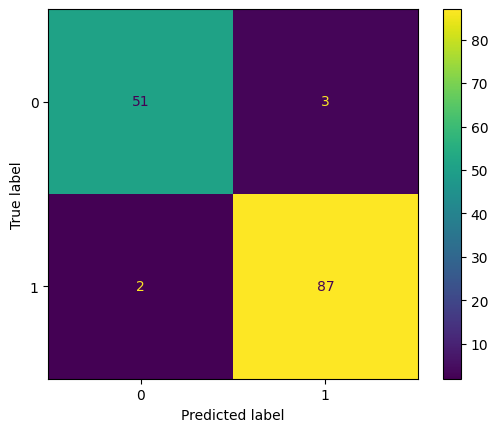

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)

<div class = "alert alert-block alert-info">
    Q2.3 - Avec <code>f1_score</code>, calculer le score f1.
</div>

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='binary')

0.9720670391061451

<div class = "alert alert-block alert-info">
    Q2.4 - En utilisant les labels des caractéristiques du dataset, dessiner un diagramme en barre de l'importance de chaque caractéristique apprise par la régression logistique.
</div>

<Axes: >

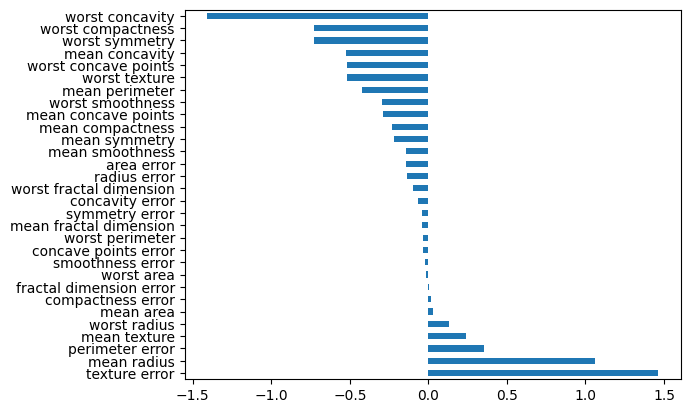

In [ ]:
coefs = logreg.coef_[0]
pd.Series(coefs, index=feature_names).nlargest(coefs.size).plot(kind='barh')

<div class = "alert alert-block alert-info">
    Q2.5 - De la même manière, donner les importances du premier exemple de la base de test.
</div>

<Axes: >

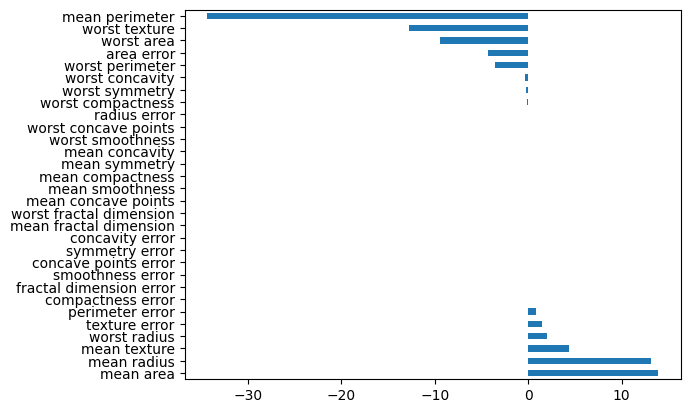

In [ ]:
coefs = logreg.coef_[0]*X_test[0]
pd.Series(coefs, index=feature_names).nlargest(coefs.size).plot(kind='barh')

## 3 - Explication avec LIME

<div class="alert alert-block alert-warning">
Nous allons étudier une explication donnée par LIME.
</div>

<div class = "alert alert-block alert-info">
    Q3.1 - Exécuter le bloc ci-dessous pour obtenir une explication sur le premier exemple de la base de test. Commentez.
</div>

In [ ]:
!pip install lime

In [ ]:
print("Prediction : ", logreg.predict(X_test[0].reshape(1,-1)))
print("Actual :     ", y_test[0])

Prediction :  [1]
Actual :      1


In [ ]:
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(X_test,
    feature_names=feature_names,
    class_names=target_names,
    categorical_features=[],
    mode='classification')


exp = explainer.explain_instance(X_test[0], logreg.predict_proba, num_features=10)

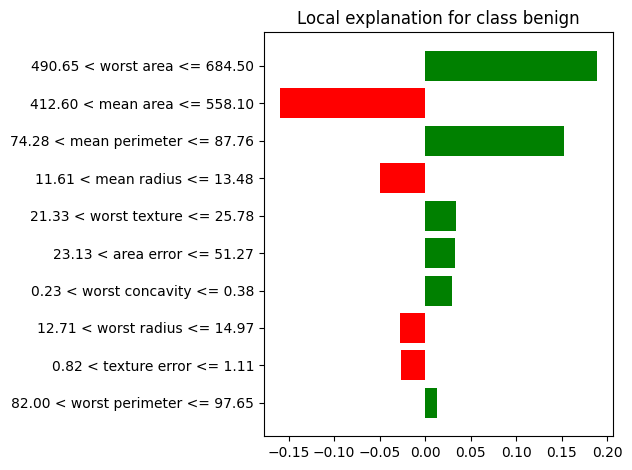

In [ ]:
exp.as_pyplot_figure()
plt.tight_layout()

In [ ]:
exp.as_list()

[('490.65 < worst area <= 684.50', 0.18892371010089967),
 ('412.60 < mean area <= 558.10', -0.1599258961332374),
 ('74.28 < mean perimeter <= 87.76', 0.15247805652058305),
 ('11.61 < mean radius <= 13.48', -0.04979107413071921),
 ('21.33 < worst texture <= 25.78', 0.03365681135936288),
 ('23.13 < area error <= 51.27', 0.033199892908134514),
 ('0.23 < worst concavity <= 0.38', 0.029765513129858298),
 ('12.71 < worst radius <= 14.97', -0.027500665624330733),
 ('0.82 < texture error <= 1.11', -0.026019500232697862),
 ('82.00 < worst perimeter <= 97.65', 0.012996353889711751)]

Commentaire :

L'explication fournie détaille les pondérations des 10 attributs qui ont influencé à la fois positivement et négativement la classification en classe "bénigne" pour le cancer du sein.

Dans cet exemple, on peut observer que les caractéristiques "mean perimeter" et "worst area" sont celles qui ont le plus contribué de manière positive à la classification en classe "bénigne". Elles sont ensuite suivies par "worst texture", "worst perimeter" et "area error"  par exemple

À l'inverse, la caractéristique "mean area" est celle qui a le plus contribué de manière négative à la classification en classe "bénigne". Elle est suivie respectivement par "mean radius" et "texture error".

D'où son appartenance à la classe 1 : **benign**


<div class = "alert alert-block alert-info">
    Q3.2 - Comparer avec l'exemple suivant de la base de test.
</div>

In [ ]:
print("Prediction : ", logreg.predict(X_test[1].reshape(1,-1)))
print("Actual :     ", y_test[1])

Prediction :  [0]
Actual :      0


In [ ]:
exp = explainer.explain_instance(X_test[1], logreg.predict_proba, num_features=10)

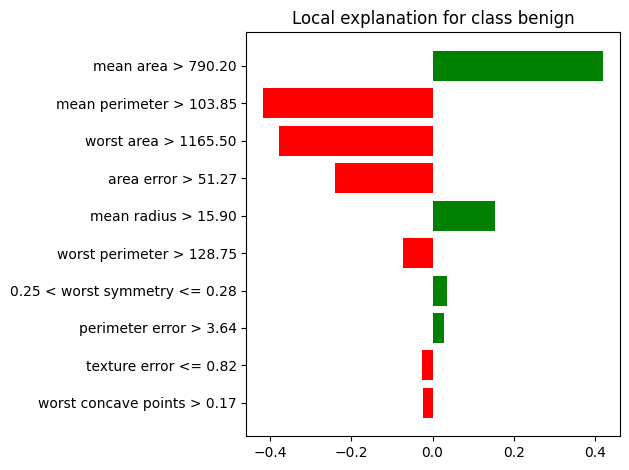

In [ ]:
exp.as_pyplot_figure()
plt.tight_layout()

In [ ]:
exp.as_list()

[('mean area > 790.20', 0.4205149712813057),
 ('mean perimeter > 103.85', -0.4170030978300558),
 ('worst area > 1165.50', -0.3786967156284952),
 ('area error > 51.27', -0.24097770905186688),
 ('mean radius > 15.90', 0.15470197021176435),
 ('worst perimeter > 128.75', -0.0723444676646379),
 ('0.25 < worst symmetry <= 0.28', 0.0356125843580171),
 ('perimeter error > 3.64', 0.027765489784639944),
 ('texture error <= 0.82', -0.026987394451010824),
 ('worst concave points > 0.17', -0.02460023194467839)]

Commentaires : L'exemple ci-dessus appartient à la classe 0 : **malignant**

On peut observer que l'explication générée par LIME varie en fonction de l'exemple spécifique fourni.

En effet, dans l'exemple précédent, la caractéristique "mean area" avait une contribution négative à la classification, tandis que dans cet exemple, elle a une contribution positive. De plus, le poids de cette contribution dépend également de l'exemple donné. Dans l'exemple précédent, le poids attribué à la caractéristique "mean area" était de -0.15, tandis que dans celui-ci, il est de 0.4.

Cependant, il est important de souligner que l'explication est toujours basée sur la classe de l'exemple donné. Elle reste cohérente dans le sens où une caractéristique qui a contribué positivement au choix de la classe "bénigne" avec un exemple dont la classe est également "bénigne" aura nécessairement une contribution négative si l'exemple appartient à la classe "maligne".

## 4 - Expérimentations

<div class="alert alert-block alert-info">
    Faire des tests pour examiner le comportement de LIME, par exemple pour examiner sa stabilité par rapport à la donné d'intérêt ou par rapport au classifieur, selon un protocole que vous définirez après avoir spécifié l'étude que vous souhaitez mener.
</div>

Nous allons dans un premier temps nous inspirer par les travaux menés par Z.Zhou, G.Hooker et F.Wand dans *S-LIME : Stabilized-LIME for Model Explanation* afin d'expérimenter la stabilité de LIME par rapport à la donnée d'intérêt.

L'expérience est conduite donc comme ceci :

Nous allons sélectionner aléatoirement une donnée de test et appliquer LIME pour expliquer la prédiction du modèle pour cette même donnée.

Nous répéterons l'expérience 100 fois toujours pour la même donnée, et calculerons la probabilité de sélections des caractéristiques ou attributs à partir des explications générées.


In [ ]:
i = test_idx = np.random.randint(0, len(X_test))

#Probabilité
proba = np.zeros(X_test.shape[1])
explications = []
for _ in range(100):
  exp = explainer.explain_instance(X_test[i], logreg.predict_proba, num_features = 10)
  explications.append(exp)

In [ ]:
import re
for e in explications :
  for feature, weight in e.as_list():
   # Supprimer les caractères "<=", ".", et les chiffres de feature tout en conservant les espaces
   feature_cleaned = re.sub(r'<=|\d|\.', '', feature)
   feature_cleaned = re.sub(r'\s+', ' ', feature_cleaned).strip()  # Supprimer les espaces supplémentaires
   # Recherche de correspondance insensible à la casse
   matching_indices = [i for i, name in enumerate(feature_names) if feature_cleaned.lower() == name.lower()]
   if matching_indices:
    for feature_idx in matching_indices:
      proba[feature_idx] += 1

In [ ]:
proba

array([  0.,  83.,   0.,   0.,   0.,  12.,   9.,  12.,  12.,   0.,  14.,
        47.,  24., 100.,   0.,   9.,   5.,  12.,   0.,   0.,   0., 100.,
         0.,   0.,   0.,  13.,  17.,   0.,   4.,   0.])

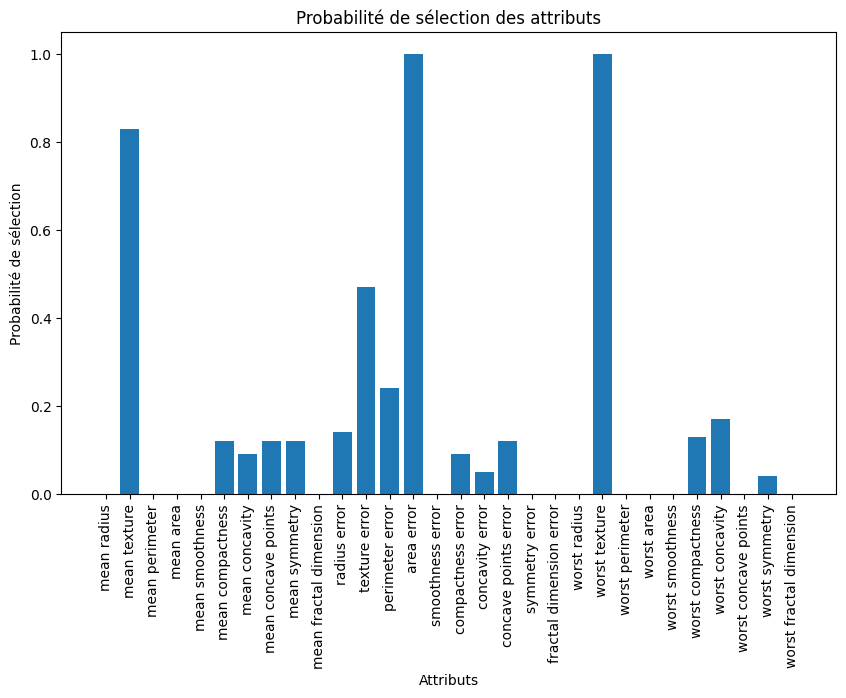

In [ ]:
proba /= 100
# Tracé du graphique
plt.figure(figsize=(10, 6))
plt.bar(range(X_test.shape[1]), proba, tick_label=feature_names, align="center")
plt.xticks(rotation=90)
plt.title("Probabilité de sélection des attributs")
plt.xlabel("Attributs")
plt.ylabel("Probabilité de sélection")
plt.show()

On peut voir que parmi les 100 répétitions, seules 2 caractéristiques sont systématiquement sélectionnées par LIME, tandis que les autres caractéristiques varient considérablement.
Il est important de noter que cela ne tient pas compte de l'ordre dans lequel les caractéristiques sont sélectionnées.

Cette expérience met en évidence une faiblesse importante de LIME : son instabilité ou irrépétabilité.
Les explications générées pour un même exemple sont effectivement différentes à chaque exécution.

In [ ]:
# Perturber l'instance et répéter l'explication pour évaluer la stabilité
perturbed_x = X_test[0].copy()
perturbed_x[:] += np.random.uniform(-0.5, 0.5)
perturbed_explanation = explainer.explain_instance(perturbed_x, logreg.predict_proba, num_features=10)



In [ ]:
print("Prediction : ", logreg.predict(perturbed_x.reshape(1,-1)))
print("Actual :     ", y_test[0])

Prediction :  [1]
Actual :      1


Les perturbations n'ont pas affectées la classification, mais l'explication de LIME est différente, ce qui prouve le point mentionné plus haut

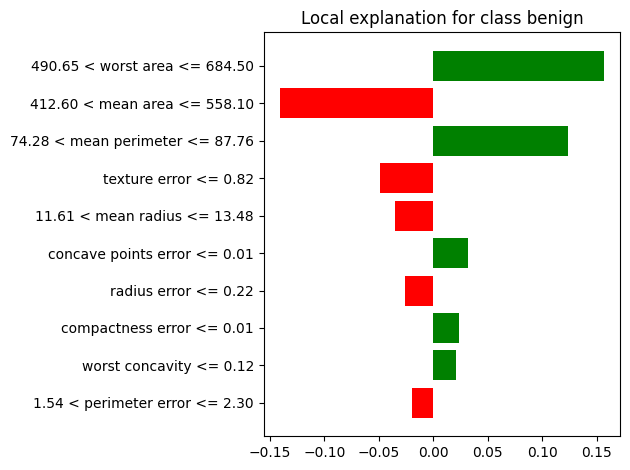

In [ ]:
perturbed_explanation.as_pyplot_figure()
plt.tight_layout()

## 5 - Données textuelles

<div class="alert alert-block alert-warning">
    Nous allons apprendre un modèle de classification random forest sur les données <code>fetch_20newsgroups</code> puis utiliser LIME pour obtenir des explications sur la classification d'exemples.
</div>

<div class = "alert alert-block alert-info">
À l'aide de la <a href="https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py">documentation du dataset fetch_20newsgroups</a>,  apprendre un modèle random forest de classification bi-classe de texte.
</div>

In [ ]:
#import du dataset
from sklearn.datasets import fetch_20newsgroups

#On souhaite apprendre un modèle de classification bi-classe (donc 2 catégories)
categories = ["alt.atheism","sci.space"]

#Données de train
data_train = fetch_20newsgroups(
    subset='train',
    categories = categories,
    shuffle = True,
    random_state = 42,
)

#Données de test
data_test = fetch_20newsgroups(
    subset='test',
    categories = categories,
    shuffle = True,
    random_state = 42,
)

target_names = data_train.target_names
target_names

['alt.atheism', 'sci.space']

In [ ]:
#split target en train et test
y_train, y_test = data_train.target, data_test.target

In [ ]:
#Extracting features from the training data and testing data using vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(sublinear_tf = True, max_df = 0.5, min_df=5, stop_words="english")

X_train = vectorizer.fit_transform(data_train.data)
X_test = vectorizer.transform(data_test.data)


In [ ]:
#Apprentissage random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000).fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
print("Test  Accuracy : %.2f"%rf.score(X_test, y_test))
print("Train Accuracy : %.2f"%rf.score(X_train, y_train))
print()
print("Confusion Matrix : ")
print(confusion_matrix(y_test, rf.predict(X_test)))
print()
print("Classification Report")
print(classification_report(y_test, rf.predict(X_test)))

Test  Accuracy : 0.96
Train Accuracy : 1.00

Confusion Matrix : 
[[291  28]
 [  3 391]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       319
           1       0.93      0.99      0.96       394

    accuracy                           0.96       713
   macro avg       0.96      0.95      0.96       713
weighted avg       0.96      0.96      0.96       713



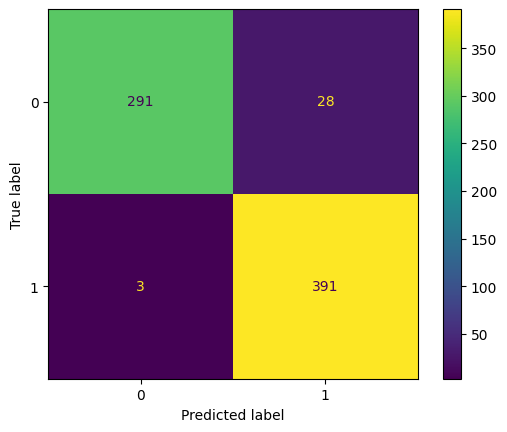

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

<div class = "alert alert-block alert-info">
Utilisez LIME pour obtenir des explications sur les prédictions obtenues sur des exemples.
    </div>

In [ ]:
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(vectorizer, rf)
explainer = LimeTextExplainer(class_names = categories)


In [ ]:
#Pour un autre exemple
exp = explainer.explain_instance(data_test.data[50], pipeline.predict_proba)
print('P(atheism)  de l exemple =', rf.predict_proba(X_test[50])[0][0])
print('classe prédite =',y_pred[50])
print("Actual classe", y_test[50])

P(atheism)  de l exemple = 0.728
classe prédite = 0
Actual classe 0


In [ ]:
exp.show_in_notebook(text=True)

Commentaires :
Nous pouvons voir que la classe prédite est la classe 0 correspondant à **alt.atheism**.

Grâce à l'explication que donne LIME, nous pouvons constater que les mots **Bible**, **Christian** ou encore **Thoughts** ont contribué positivement à cette classe (et donc négativement à la classe 1 **sci.space**), ce qui explique la prédiction


In [ ]:
exp = explainer.explain_instance(data_test.data[10], pipeline.predict_proba,)

In [ ]:
print('P(atheism)  de l exemple =', rf.predict_proba(X_test[10])[0][0])
print('classe prédite =',y_pred[10])
print("Actual classe", y_test[10])

P(atheism)  de l exemple = 0.055
classe prédite = 1
Actual classe 1


In [ ]:
exp.show_in_notebook()

Commentaires :
Nous pouvons voir ici que contrairement à l'exemple ci-dessous, que les mots **Space**, **Moon** ou encore **Spencer** on contribué positivement à classe 1 et donc négativement à la classe 0 (les mots **west**, **apple**, et **ask** ont quant à eux, contribué négativement à la classe 1)


## 6 - Implémentation de LIME

<div class="alert alert-block alert-info">
    Sur des données textuelles, implémentez une version rudimentaire de LIME en utilisant la fonction de proximité proposée dans le cours. Retrouvez-vous les mêmes vecteurs d'importance qu'avec la bibliothèque LIME ?
</div>

Ce dont on a besoin :
* Une donnée d'exemple
* Un modèle

Procédure à suivre :
* Générer les variations de Z
* Prédire leur classe à partir du modèle avec lequel on a prédit Z
* Apprendre un modèle linéaire qui donne une proba des exemples générés selon.


1. Génération des variations de Z

In [ ]:
#texte tiré du dataset pour tester : on sait qu'il appartient à classe 1
t = "The temperature of intergalactic space "
n = 10

t_split= t.split()
#print(t_split)
# Générer un tableau aléatoire de 0 et 1
#C'est ce qui va nous permettre de supprimer aléatoirement des mots
#Représentation one-hot
mots_supp = np.random.randint(2, size=(n, len(t_split)))
mots_supp


array([[0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1],
       [1, 1, 1, 0, 1],
       [1, 1, 1, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 1, 1],
       [1, 1, 1, 1, 0],
       [1, 1, 1, 0, 0],
       [0, 1, 1, 1, 0]])

In [ ]:
df = pd.DataFrame(mots_supp, columns=t_split)
df

,The,temperature,of,intergalactic,space
0,0,0,1,0,0
1,0,0,0,0,0
2,0,1,0,0,1
3,1,1,1,0,1
4,1,1,1,0,1
5,1,0,0,0,0
6,0,1,0,1,1
7,1,1,1,1,0
8,1,1,1,0,0
9,0,1,1,1,0


In [ ]:
df['poids'] = df.apply(lambda x: 1 - ((len(t_split)-x.sum())/(len(t_split))), axis=1)
df

,The,temperature,of,intergalactic,space,poids
0,0,0,1,0,0,0.2
1,0,0,0,0,0,0.0
2,0,1,0,0,1,0.4
3,1,1,1,0,1,0.8
4,1,1,1,0,1,0.8
5,1,0,0,0,0,0.2
6,0,1,0,1,1,0.6
7,1,1,1,1,0,0.8
8,1,1,1,0,0,0.6
9,0,1,1,1,0,0.6


In [ ]:
proba = []
for index, row in df.iterrows():
  selected_words = row.index[row == 1].tolist()

  if selected_words :
    selected_text = ' '.join(selected_words)
    #print(selected_text)
    proba.append(pipeline.predict_proba([selected_text])[0][1])
    #print(pipeline.predict_proba([selected_text]))
  else :
    proba.append(-1)

df['proba prédite de la classe 1 : sci.space'] = proba
df

,The,temperature,of,intergalactic,space,poids,proba prédite de la classe 1 : sci.space
0,0,0,1,0,0,0.2,0.932
1,0,0,0,0,0,0.0,-1.000
2,0,1,0,0,1,0.4,0.991
3,1,1,1,0,1,0.8,0.991
4,1,1,1,0,1,0.8,0.991
5,1,0,0,0,0,0.2,0.932
6,0,1,0,1,1,0.6,0.991
7,1,1,1,1,0,0.8,0.933
8,1,1,1,0,0,0.6,0.933
9,0,1,1,1,0,0.6,0.933


Nous pouvons déjà constater que les mots **temperature** et **space** ont un impact sur la prédiction de notre modèle.

En effet, comme les résultats obtenus plus haut, nous voyons bien que la présence de **space** augmente considérablement notre probabilité, tandis que **temperature** a elle aussi, un effet positif mais plus faible

In [ ]:
#Mot de l'autre classe
t = "all from the Christian Bible"
n = 10

t_split= t.split()
#print(t_split)
# Générer un tableau aléatoire de 0 et 1
#C'est ce qui va nous permettre de supprimer aléatoirement des mots
#Représentation one-hot
mots_supp = np.random.randint(2, size=(n, len(t_split)))
mots_supp
df_ = pd.DataFrame(mots_supp, columns=t_split)
df_['poids'] = df_.apply(lambda x: 1 - ((len(t_split)-x.sum())/(len(t_split))), axis=1)
proba = []
for index, row in df_.iterrows():
  selected_words = row.index[row == 1].tolist()

  if selected_words :
    selected_text = ' '.join(selected_words)
    #print(selected_text)
    proba.append(pipeline.predict_proba([selected_text])[0][0])
    #print(pipeline.predict_proba([selected_text]))
  else :
    proba.append(-1)

df_['proba prédite de la classe 0 : atheist'] = proba
df_

,all,from,the,Christian,Bible,poids,proba prédite de la classe 0 : atheist
0,0,1,1,0,1,0.6,0.344
1,1,0,1,0,1,0.6,0.344
2,1,0,0,1,0,0.4,0.269
3,1,1,1,1,0,0.8,0.269
4,1,0,1,0,0,0.4,0.068
5,1,1,0,0,0,0.4,0.068
6,1,1,0,0,1,0.6,0.344
7,0,0,0,0,0,0.0,-1.000
8,1,1,1,1,1,1.0,0.492
9,1,0,1,0,1,0.6,0.344


Nous observons des résultats cohérents par rapport à ceux obtenus dans la partie 5

2. Apprentissage d’un modèle linéaire g pour prédire Pf

In [ ]:
#Pour l'apprentissage avec un modèle linéaire, nous avons choisi d'opter
#pour une régression logistique
df[["all","from","the","Christian","Bible"]] = 0
df_[["The","temperature","of","intergalactic","space"]] = 0

d1 = df[["The","temperature","of","intergalactic","space","all","from","the","Christian","Bible"]].to_numpy()
d2 = df_[["The","temperature","of","intergalactic","space","all","from","the","Christian","Bible"]].to_numpy()

X = np.vstack((d1,d2))
print(X)



[[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0]
 [1 1 1 0 1 0 0 0 0 0]
 [1 1 1 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 1 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 1]
 [0 0 0 0 0 1 0 1 0 1]
 [0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 0 1 1 1 1 0]
 [0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 1 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 1 0 1 0 1]]


In [ ]:
Y = np.concatenate((np.ones(d1.shape[0]),np.zeros(d2.shape[0])))
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [ ]:
poid = np.concatenate((df["poids"].to_numpy(),df_["poids"].to_numpy()))
poid

array([0.2, 0. , 0.4, 0.8, 0.8, 0.2, 0.6, 0.8, 0.6, 0.6, 0.6, 0.6, 0.4,
       0.8, 0.4, 0.4, 0.6, 0. , 1. , 0.6])

In [ ]:
clf = LogisticRegression(class_weight= 'balanced',max_iter = 1000)
clf.fit(X,Y, sample_weight = poid )


LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
coefs = clf.coef_[0]
print("coefficients de la regression logistique: \n \n", coefs)

coefficients de la regression logistique: 
 
 [ 0.44547239  0.69098872  0.54543245  0.31815612  0.39684669 -0.73116901
 -0.46943931 -0.54740138 -0.27694168 -0.4626043 ]


In [ ]:
coefs.shape

(10,)

In [ ]:
class_1 = 1
class_2 = 0
#probas générés par RF en haut
proba_1 = 0.935
proba_2 = 0.055


df_fin = pd.DataFrame()
df_fin["feature_weight"] = coefs
df_fin["feature"] =  feature_names
df_fin["class"] =  np.concatenate((np.array([class_1]*5),np.array([class_2]*5)))
df_fin["label_prob"] = np.concatenate((np.array([proba_1]*5),np.array([proba_2]*5)))

In [ ]:
df_fin.tail(6)

,feature_weight,feature,class,label_prob
4,0.396847,space,1,0.935
5,-0.731169,all,0,0.055
6,-0.469439,from,0,0.055
7,-0.547401,the,0,0.055
8,-0.276942,Christian,0,0.055
9,-0.462604,Bible,0,0.055


Ainsi, nous retrouvons les résultats donnés dans la partie 5.

En effet, pour la classe 1 : sci.space, nous retrouvons la caractéristique **space** qui influençait positivement et de façon très significative la prédiction du modèle.

Que ce soit pour la classe 1 ou la classe 0, nous avons réussi à trouver les résultats générés en partie 5.

Test avec fonction plus complète et générale

In [ ]:
from copy import copy

def generate_variations(x,n):
  """
  Procédure de génération des données Z différente : a partir d'un texte d'intérêt, supprimer aléatoirement des mots de ce dernier.

  """
  poids = []
  texte_split = x.split(" ")
  nb_mots = len(texte_split)
  sigma = int(0.75 * np.sqrt(nb_mots))
  texte_modifie = []

  for i in range(n):
    texte_split_temp = copy(texte_split)
    nb_mots_a_supp = np.random.randint(0,sigma)
    idx_mots_a_supp = np.random.randint(0,nb_mots,size = nb_mots_a_supp)
    for j in idx_mots_a_supp :
      texte_split_temp[j] = ""

    texte_modifie.append(" ".join(texte_split_temp))
    print(texte_modifie[i])
    poids.append(1 - (nb_mots_a_supp/ nb_mots))
    print(poids[i])


  return texte_modifie, poids

In [ ]:
#X_test, X_train, y_test, y_train sont déjà définis plus haut
# classe de l'exemple a considérer
print(data_test.data[0])
print(f"Classe de l'exemple : {rf.predict(X_test[0])}")

From: bobbe@vice.ICO.TEK.COM (Robert Beauchaine)
Subject: Re: Requests
Organization: Tektronix Inc., Beaverton, Or.
Lines: 17

In article <healta.157.735271671@saturn.wwc.edu> healta@saturn.wwc.edu (Tammy R Healy) writes:
>
>Bob, if you're wanting an excuse to convert to Christianity, you gonna have 
>to look elsewhere.
>

  Damn.  And I did so have my hopes up.


/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\ 

Bob Beauchaine bobbe@vice.ICO.TEK.COM 

They said that Queens could stay, they blew the Bronx away,
and sank Manhattan out at sea.

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Classe de l'exemple : [0]


In [ ]:
texte_modifie, poids = generate_variations(data_test.data[0], 1)

From: bobbe@vice.ICO.TEK.COM (Robert Beauchaine)
Subject: Re: Requests
Organization: Tektronix Inc., Beaverton, Or.
Lines: 17

In article <healta.157.735271671@saturn.wwc.edu> healta@saturn.wwc.edu  R Healy) writes:
>
>Bob, if you're  an excuse to convert to Christianity, you gonna have 
>to look elsewhere.
>

  Damn.  And I did so have my hopes up.


/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\ 

Bob Beauchaine bobbe@vice.ICO.TEK.COM 

They said that Queens could stay,  blew the  away,
and sank Manhattan out at sea.

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

0.9365079365079365
